In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import matplotlib.patches as mpatches
import time

import collections
from collections import Counter

import warnings
warnings.filterwarnings("ignore")

In [5]:
# загрузка данных и структура данных
df=pd.read_csv('/content/bank-full.csv')

df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [6]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
# Применяем Label Encoding для признаков с порядком (housing, loan, education, contact)
le = LabelEncoder()
df['education'] = le.fit_transform(df['education'])
df['housing'] = le.fit_transform(df['housing'])
df['loan'] = le.fit_transform(df['loan'])
df['contact'] = le.fit_transform(df['contact'])
df['default'] = le.fit_transform(df['default'])

# Применяем One-Hot Encoding для признаков без порядка
df = pd.get_dummies(df, columns=['job', 'marital', 'month', 'poutcome'], drop_first=True)

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import pandas as pd

# Разделяем данные на признаки (X) и целевую переменную (y)
X = df.drop('y', axis=1)
y = df['y'].map({'yes': 1, 'no': 0})  # Преобразуем целевую переменную в 0 и 1
# Преобразуем целевую переменную 'y' в числовой формат
df['y'] = df['y'].map({'yes': 1, 'no': 0})


# Масштабируем числовые признаки в диапазон [0, 1]
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)





In [7]:
df.describe()

,age,education,default,balance,housing,loan,contact,day,duration,campaign,pdays,previous,y
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1.224813,0.018027,1362.272058,0.555838,0.160226,0.640242,15.806419,258.163080,2.763841,40.197828,0.580323,0.116985
std,10.618762,0.747997,0.133049,3044.765829,0.496878,0.366820,0.897951,8.322476,257.527812,3.098021,100.128746,2.303441,0.321406
min,18.000000,0.000000,0.000000,-8019.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,0.000000
25%,33.000000,1.000000,0.000000,72.000000,0.000000,0.000000,0.000000,8.000000,103.000000,1.000000,-1.000000,0.000000,0.000000
50%,39.000000,1.000000,0.000000,448.000000,1.000000,0.000000,0.000000,16.000000,180.000000,2.000000,-1.000000,0.000000,0.000000
75%,48.000000,2.000000,0.000000,1428.000000,1.000000,0.000000,2.000000,21.000000,319.000000,3.000000,-1.000000,0.000000,0.000000
max,95.000000,3.000000,1.000000,102127.000000,1.000000,1.000000,2.000000,31.000000,4918.000000,63.000000,871.000000,275.000000,1.000000


In [8]:
new_df = df.copy()

In [9]:
new_df

,age,education,default,balance,housing,loan,contact,day,duration,campaign,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,58,2,0,2143,1,0,2,5,261,1,...,False,False,False,True,False,False,False,False,False,True
1,44,1,0,29,1,0,2,5,151,1,...,False,False,False,True,False,False,False,False,False,True
2,33,1,0,2,1,1,2,5,76,1,...,False,False,False,True,False,False,False,False,False,True
3,47,3,0,1506,1,0,2,5,92,1,...,False,False,False,True,False,False,False,False,False,True
4,33,3,0,1,0,0,2,5,198,1,...,False,False,False,True,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,2,0,825,0,0,0,17,977,3,...,False,False,False,False,True,False,False,False,False,True
45207,71,0,0,1729,0,0,0,17,456,2,...,False,False,False,False,True,False,False,False,False,True
45208,72,1,0,5715,0,0,0,17,1127,5,...,False,False,False,False,True,False,False,False,True,False
45209,57,1,0,668,0,0,1,17,508,4,...,False,False,False,False,True,False,False,False,False,True


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42,
                                                    stratify = y)
# Переводим данные в массив для подачи в классификатор
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# Выберем несколько простых моделей из библиотеки sklearn

classifiers = {
    "LogisiticRegression": LogisticRegression(),  # Логистическая регрессия
    "Support Vector Classifier": SVC(),  # Метод опорных векторов
    "KNearest": KNeighborsClassifier(),# Метод ближайших соседей
    "DecisionTreeClassifier": DecisionTreeClassifier() # Решающее дерево
}

In [ ]:
from sklearn.model_selection import cross_val_score

for key, classifier in classifiers.items():
    #classifier.fit(X_train, y_train)
    training_score = cross_val_score(classifier, X_train, y_train, cv=5)
    print("Модель ", classifier.__class__.__name__, "получила на обучающей выборке", round(training_score.mean(), 2) * 100, "% accuracy score")

Модель  LogisticRegression получила на обучающей выборке 89.0 % accuracy score
Модель  SVC получила на обучающей выборке 88.0 % accuracy score
Модель  KNeighborsClassifier получила на обучающей выборке 88.0 % accuracy score
Модель  DecisionTreeClassifier получила на обучающей выборке 87.0 % accuracy score


In [ ]:
# Используем поиск по сетке для подбора гиперпараметров
from sklearn.model_selection import GridSearchCV

# Логистическая регрессия
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params)
grid_log_reg.fit(X_train, y_train)

# Выбираем лучшую модель
log_reg = grid_log_reg.best_estimator_ #  для Логистическая регрессия

# Метод ближайших соседей
knears_params = {"n_neighbors": list(range(2,7,1)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

grid_knears = GridSearchCV(KNeighborsClassifier(), knears_params)
grid_knears.fit(X_train, y_train)

knears_neighbors = grid_knears.best_estimator_# для  K ближайший соседей

# Метод опорных векторов
x = [1.0, 1000.0]
y = [0.9]
z = [4]
svc_params=[
            {'C': x,'kernel': ['rbf'],'gamma': y} ,
            {'C': x,'kernel': ['poly'],'gamma': y,'degree': z}
           ]
grid_svc=GridSearchCV(estimator = SVC(),
                        param_grid = svc_params,
                        scoring='accuracy',
                        cv=3,
                        n_jobs=-1)

grid_svc.fit(X_train, y_train)

svc = grid_svc.best_estimator_#  для SVM

# Решающее дерево
tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,7,1)),
              "min_samples_leaf": list(range(5,7,1))}
grid_tree = GridSearchCV(DecisionTreeClassifier(), tree_params)
grid_tree.fit(X_train, y_train)

tree_clf = grid_tree.best_estimator_#  для решающий деревьев

In [ ]:
# Проверим, как поменялись метрики

log_reg_score = cross_val_score(log_reg, X_train, y_train, cv=5)
print('Logistic Regression Cross Validation Score: ', round(log_reg_score.mean() * 100, 2).astype(str) + '%')


knears_score = cross_val_score(knears_neighbors, X_train, y_train, cv=5)
print('Knears Neighbors Cross Validation Score', round(knears_score.mean() * 100, 2).astype(str) + '%')

svc_score = cross_val_score(svc, X_train, y_train, cv=5)
print('Support Vector Classifier Cross Validation Score', round(svc_score.mean() * 100, 2).astype(str) + '%')

tree_score = cross_val_score(tree_clf, X_train, y_train, cv=5)
print('DecisionTree Classifier Cross Validation Score', round(tree_score.mean() * 100, 2).astype(str) + '%')

Logistic Regression Cross Validation Score:  89.15%
Knears Neighbors Cross Validation Score 88.63%
Support Vector Classifier Cross Validation Score 88.3%
DecisionTree Classifier Cross Validation Score 90.21%


In [ ]:
from imblearn.under_sampling import NearMiss
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from collections import Counter
import numpy as np

# Выводим распределение классов до применения NearMiss
print(f"Распределение классов до балансировки:\n{Counter(y_train)}")

# Создаем объект NearMiss для undersampling
near_miss = NearMiss()

# Применяем NearMiss для балансировки классов
X_nearmiss, y_nearmiss = near_miss.fit_resample(X_train, y_train)

# Выводим распределение классов после применения NearMiss
print(f"Распределение классов после NearMiss:\n{Counter(y_nearmiss)}")

# Определяем модель для обучения (DecisionTreeClassifier)
tree_clf = DecisionTreeClassifier(random_state=42)

# Стратифицированная кросс-валидация
skf = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)

# Списки для хранения метрик
accuracy = []
precision = []
recall = []
f1 = []
auc = []

# Применяем кросс-валидацию для обучения и оценки модели
for train_idx, test_idx in skf.split(X_nearmiss, y_nearmiss):
    X_train_fold, X_test_fold = X_nearmiss[train_idx], X_nearmiss[test_idx]
    y_train_fold, y_test_fold = y_nearmiss[train_idx], y_nearmiss[test_idx]

    # Создаем пайплайн с NearMiss и классификатором
    pipeline = imbalanced_make_pipeline(NearMiss(sampling_strategy='majority'), tree_clf)

    # Обучение модели
    model = pipeline.fit(X_train_fold, y_train_fold)

    # Прогнозирование на тестовом наборе
    y_pred = model.predict(X_test_fold)

    # Оценка метрик
    accuracy.append(model.score(X_test_fold, y_test_fold))
    precision.append(precision_score(y_test_fold, y_pred))
    recall.append(recall_score(y_test_fold, y_pred))
    f1.append(f1_score(y_test_fold, y_pred))
    auc.append(roc_auc_score(y_test_fold, y_pred))

# Вывод средних значений метрик
print(f"Средняя точность (accuracy): {np.mean(accuracy):.4f}")
print(f"Средняя точность (precision): {np.mean(precision):.4f}")
print(f"Средняя полнота (recall): {np.mean(recall):.4f}")
print(f"Средний F1-скор: {np.mean(f1):.4f}")
print(f"Средний AUC: {np.mean(auc):.4f}")



Распределение классов до балансировки:
Counter({0: 31937, 1: 4231})
Распределение классов после NearMiss:
Counter({0: 4231, 1: 4231})
Средняя точность (accuracy): 0.8808
Средняя точность (precision): 0.8814
Средняя полнота (recall): 0.8799
Средний F1-скор: 0.8807
Средний AUC: 0.8808


In [ ]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve
import seaborn as sn

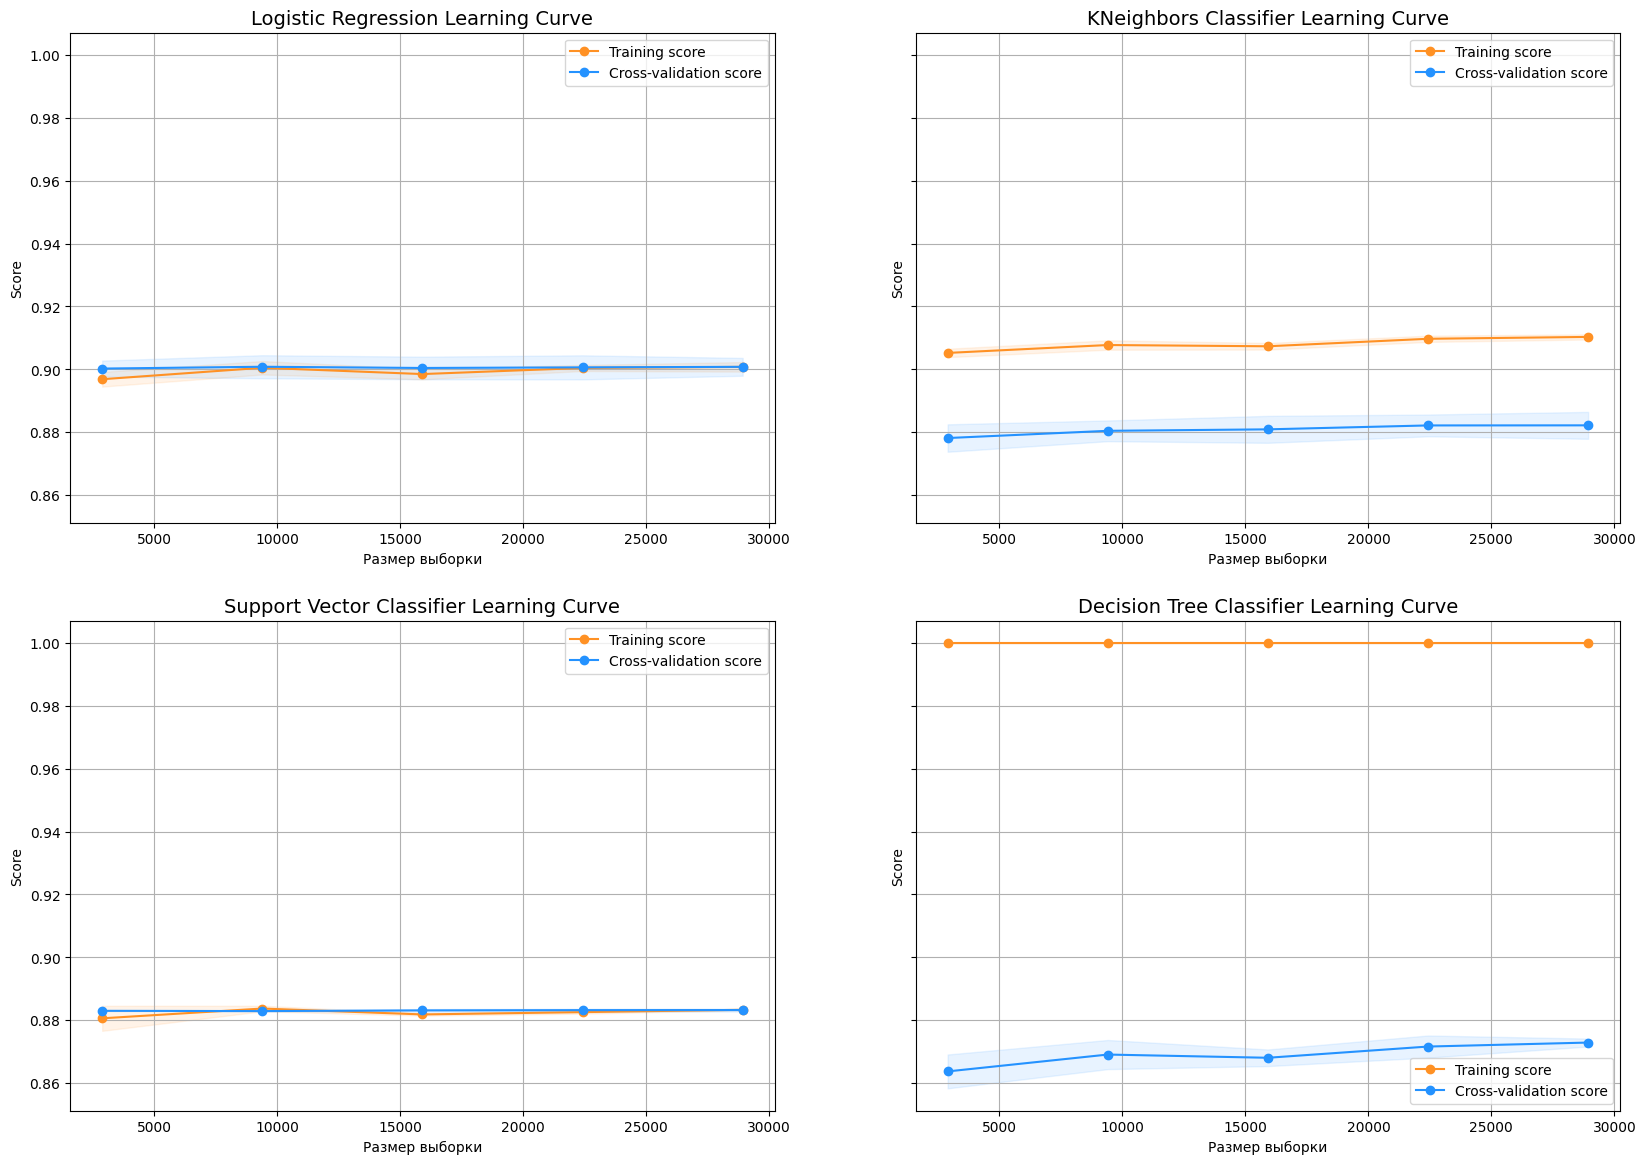

In [ ]:
# Визуализация кривых обучения для нескольких классификаторов
def plot_learning_curves(estimator1, estimator2, estimator3, estimator4, X, y, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(20,14), sharey=True)
    if ylim is not None:
        plt.ylim(*ylim)

    # Первая модель: Логистическая регрессия
    train_sizes, train_scores, test_scores = learning_curve(estimator1, X, y, cv=cv,
                                                            n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax1.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax1.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax1.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124", label="Training score")
    ax1.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff", label="Cross-validation score")
    ax1.set_title("Logistic Regression Learning Curve", fontsize=14)
    ax1.set_xlabel('Размер выборки')
    ax1.set_ylabel('Score')
    ax1.grid(True)
    ax1.legend(loc="best")

    # Вторая модель: Метод ближайших соседей (KNN)
    train_sizes, train_scores, test_scores = learning_curve(estimator2, X, y, cv=cv,
                                                            n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax2.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax2.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax2.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124", label="Training score")
    ax2.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff", label="Cross-validation score")
    ax2.set_title("KNeighbors Classifier Learning Curve", fontsize=14)
    ax2.set_xlabel('Размер выборки')
    ax2.set_ylabel('Score')
    ax2.grid(True)
    ax2.legend(loc="best")

    # Третья модель: Метод опорных векторов (SVC)
    train_sizes, train_scores, test_scores = learning_curve(estimator3, X, y, cv=cv,
                                                            n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax3.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax3.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax3.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124", label="Training score")
    ax3.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff", label="Cross-validation score")
    ax3.set_title("Support Vector Classifier Learning Curve", fontsize=14)
    ax3.set_xlabel('Размер выборки')
    ax3.set_ylabel('Score')
    ax3.grid(True)
    ax3.legend(loc="best")

    # Четвертая модель: Решающее дерево (Decision Tree)
    train_sizes, train_scores, test_scores = learning_curve(estimator4, X, y, cv=cv,
                                                            n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax4.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax4.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax4.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124", label="Training score")
    ax4.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff", label="Cross-validation score")
    ax4.set_title("Decision Tree Classifier Learning Curve", fontsize=14)
    ax4.set_xlabel('Размер выборки')
    ax4.set_ylabel('Score')
    ax4.grid(True)
    ax4.legend(loc="best")

    return plt

# Настройка моделей для проверки
log_reg = LogisticRegression(max_iter=1000)
knears_neighbors = KNeighborsClassifier()
svc = SVC()
tree_clf = DecisionTreeClassifier()

# Используем StratifiedKFold для кросс-валидации
skf = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)

# Визуализация кривых обучения для всех моделей
plot_learning_curves(log_reg, knears_neighbors, svc, tree_clf, X_train, y_train, cv=skf)
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_predict

log_reg_pred = cross_val_predict(log_reg, X_train, y_train, cv=5,
                             method="decision_function")

knears_pred = cross_val_predict(knears_neighbors, X_train, y_train, cv=5)

svc_pred = cross_val_predict(svc, X_train, y_train, cv=5,
                             method="decision_function")

tree_pred = cross_val_predict(tree_clf, X_train, y_train, cv=5)

In [ ]:
print('Logistic Regression: ', roc_auc_score(y_train, log_reg_pred))
print('KNears Neighbors: ', roc_auc_score(y_train, knears_pred))
print('Support Vector Classifier: ', roc_auc_score(y_train, svc_pred))
print('Decision Tree Classifier: ', roc_auc_score(y_train, tree_pred))

Logistic Regression:  0.8966361754200154
KNears Neighbors:  0.6183277565771901
Support Vector Classifier:  0.7199834313961604
Decision Tree Classifier:  0.7026437329750332


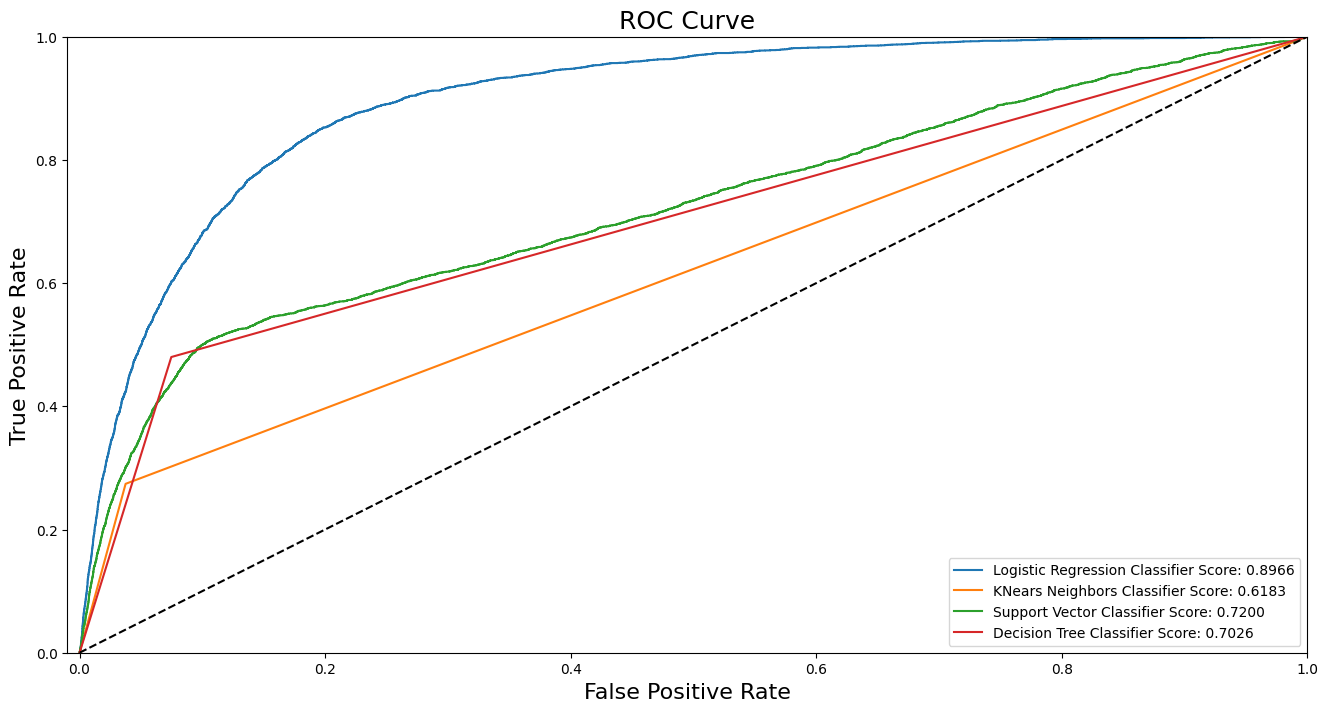

In [ ]:
log_fpr, log_tpr, log_thresold = roc_curve(y_train, log_reg_pred)#
knear_fpr, knear_tpr, knear_threshold = roc_curve(y_train, knears_pred)#
svc_fpr, svc_tpr, svc_threshold = roc_curve(y_train, svc_pred)#
tree_fpr, tree_tpr, tree_threshold = roc_curve(y_train, tree_pred)#


def graph_roc_curve_multiple(log_fpr, log_tpr, knear_fpr, knear_tpr, svc_fpr, svc_tpr, tree_fpr, tree_tpr):
    plt.figure(figsize=(16,8))
    plt.title('ROC Curve', fontsize=18)
    plt.plot(log_fpr, log_tpr, label='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(y_train, log_reg_pred)))
    plt.plot(knear_fpr, knear_tpr, label='KNears Neighbors Classifier Score: {:.4f}'.format(roc_auc_score(y_train, knears_pred)))
    plt.plot(svc_fpr, svc_tpr, label='Support Vector Classifier Score: {:.4f}'.format(roc_auc_score(y_train, svc_pred)))
    plt.plot(tree_fpr, tree_tpr, label='Decision Tree Classifier Score: {:.4f}'.format(roc_auc_score(y_train, tree_pred)))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.01, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.legend()

graph_roc_curve_multiple(log_fpr, log_tpr, knear_fpr, knear_tpr, svc_fpr, svc_tpr, tree_fpr, tree_tpr)
plt.show()

In [ ]:
train_unique_label, train_counts_label = np.unique(y_train, return_counts=True)
test_unique_label, test_counts_label = np.unique(y_test, return_counts=True)

print('Распределение классов: \n')
print("Обучающий набор:", train_counts_label / len(y_train))
print("Тестовый набор:", test_counts_label / len(y_test))

Распределение классов: 

Обучающий набор: [0.88301814 0.11698186]
Тестовый набор: [0.88300343 0.11699657]


In [ ]:
# сохраним параметры наших классификаторов, на которых они показали лучших результат с GridSearchCV

#dictionary of classifiers objects which we got in the above cell via GridSearchCV
#with the tuned parameters
tuned_classifiers = {
    "LogisiticRegression": log_reg,
    "Knears Neighbors": knears_neighbors,
    # "Support Vector Classifier": svc,
    "DecisionTreeClassifier": tree_clf
}

#Making our Classifiers train with the tuned parameters
for key, classifier in tuned_classifiers.items():
    score = cross_val_score(classifier, X_train, y_train, cv=5)
    print(f'{key} Cross Validation Score: {round(score.mean() * 100, 2)}%')

LogisiticRegression Cross Validation Score: 90.04%
Knears Neighbors Cross Validation Score: 88.2%
DecisionTreeClassifier Cross Validation Score: 87.34%


In [ ]:
#Over Sampling and under sampling libraries
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

#Machine learning Pipeline libraries
from imblearn.pipeline import Pipeline



# here we are using the imbalanced dataset
X = new_df.drop('y', axis=1)
y = new_df['y']

# StratifiedKFold для кросс-валидации
sss = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

# SMOTE для оверсемплинга с более высоким значением sampling_strategy
over = SMOTE(sampling_strategy=1.0, k_neighbors=5)  # Сбалансированные классы

# RandomUnderSampler для андерсемплинга с более высокой стратегией
under = RandomUnderSampler(sampling_strategy='auto')  # Автоматическое уменьшение большинства

# Итерация по классификаторам
for key, classifier in tuned_classifiers.items():
    # Шаги для пайплайна: сначала оверсемплинг, потом андерсемплинг, затем классификатор
    steps = [('o', over), ('u', under), ('model', classifier)]

    # Создание пайплайна
    FiPipeline = Pipeline(steps=steps)

    # Кросс-валидация
    scores = cross_val_score(FiPipeline, X, y, cv=sss)

    # Вывод результата
    print(f"Классификатор: {key} имеет средний accuracy: {round(scores.mean() * 100, 2)} %")


Классификатор: LogisiticRegression имеет средний accuracy: 74.58 %
Классификатор: Knears Neighbors имеет средний accuracy: 75.4 %
Классификатор: DecisionTreeClassifier имеет средний accuracy: 55.9 %


In [ ]:
# taking a fold of a data to do GridSearchCV for best parameters for SMOTE
for train_index, test_index in sss.split(X, y):
    original_Xtrain, original_Xtest = X.iloc[train_index], X.iloc[test_index]
    original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]

# creating a ML pipeline
model = Pipeline([
        ('sampling', SMOTE(sampling_strategy=0.2)),
        ('Random',RandomUnderSampler(sampling_strategy=0.5)),
        ('classification', log_reg)
    ])

# Running GridSearchCV on our ML pipeline by varying the k_neighbors from 1 to 10
# to find the best k_neighbors parameter value
# NOTE :- in paramgrid use above key + 2 _ followed by parameter
SMOTE_KN = GridSearchCV(model,{'sampling__k_neighbors':list(range(1,10))})
SMOTE_KN.fit(original_Xtrain,original_ytrain)

print(SMOTE_KN.best_estimator_)
print(SMOTE_KN.best_score_)
print(SMOTE_KN.best_params_)

# Training logistic regression classifier using SMOTE best parameter value for k_neighbors parameter
log_reg_score = cross_val_score(SMOTE_KN.best_estimator_, original_Xtrain, original_ytrain, cv=5)

# printing the mean accuracy score
print(f'Logistic Regression Cross Validation Score: {round(log_reg_score.mean() * 100, 2)}%')


Pipeline(steps=[('sampling', SMOTE(k_neighbors=9, sampling_strategy=0.2)),
                ('Random', RandomUnderSampler(sampling_strategy=0.5)),
                ('classification', LogisticRegression(max_iter=1000))])
0.7286506095671464
{'sampling__k_neighbors': 9}
Logistic Regression Cross Validation Score: 70.11%


In [ ]:
labels = ['No', 'Yes']

best_est = SMOTE_KN.best_estimator_
smote_prediction = best_est.predict(original_Xtest)
print(classification_report(original_ytest, smote_prediction, target_names=labels))

              precision    recall  f1-score   support

          No       0.95      0.52      0.67      7984
         Yes       0.18      0.78      0.29      1058

    accuracy                           0.55      9042
   macro avg       0.56      0.65      0.48      9042
weighted avg       0.86      0.55      0.63      9042



In [ ]:
y_score = best_est.decision_function(original_Xtest)

In [ ]:
sm = SMOTE(sampling_strategy='minority', random_state=42)

# Применим SMOTE после кросс-валидации
Xsm_train, ysm_train = sm.fit_resample(original_Xtrain, original_ytrain)

In [ ]:
# Обучим логистическую регрессию
t0 = time.time()
log_reg_sm = grid_log_reg.best_estimator_
log_reg_sm.fit(Xsm_train, ysm_train)
t1 = time.time()
print("Время обучения: {} сек".format(t1 - t0))

Время обучения: 1.2724668979644775 сек


In [ ]:
# Обучим логистическую регрессию
t0 = time.time()
log_reg_sm = grid_log_reg.best_estimator_
log_reg_sm.fit(Xsm_train, ysm_train)
t1 = time.time()
print("Время обучения: {} сек".format(t1 - t0))

Время обучения: 1.9240965843200684 сек


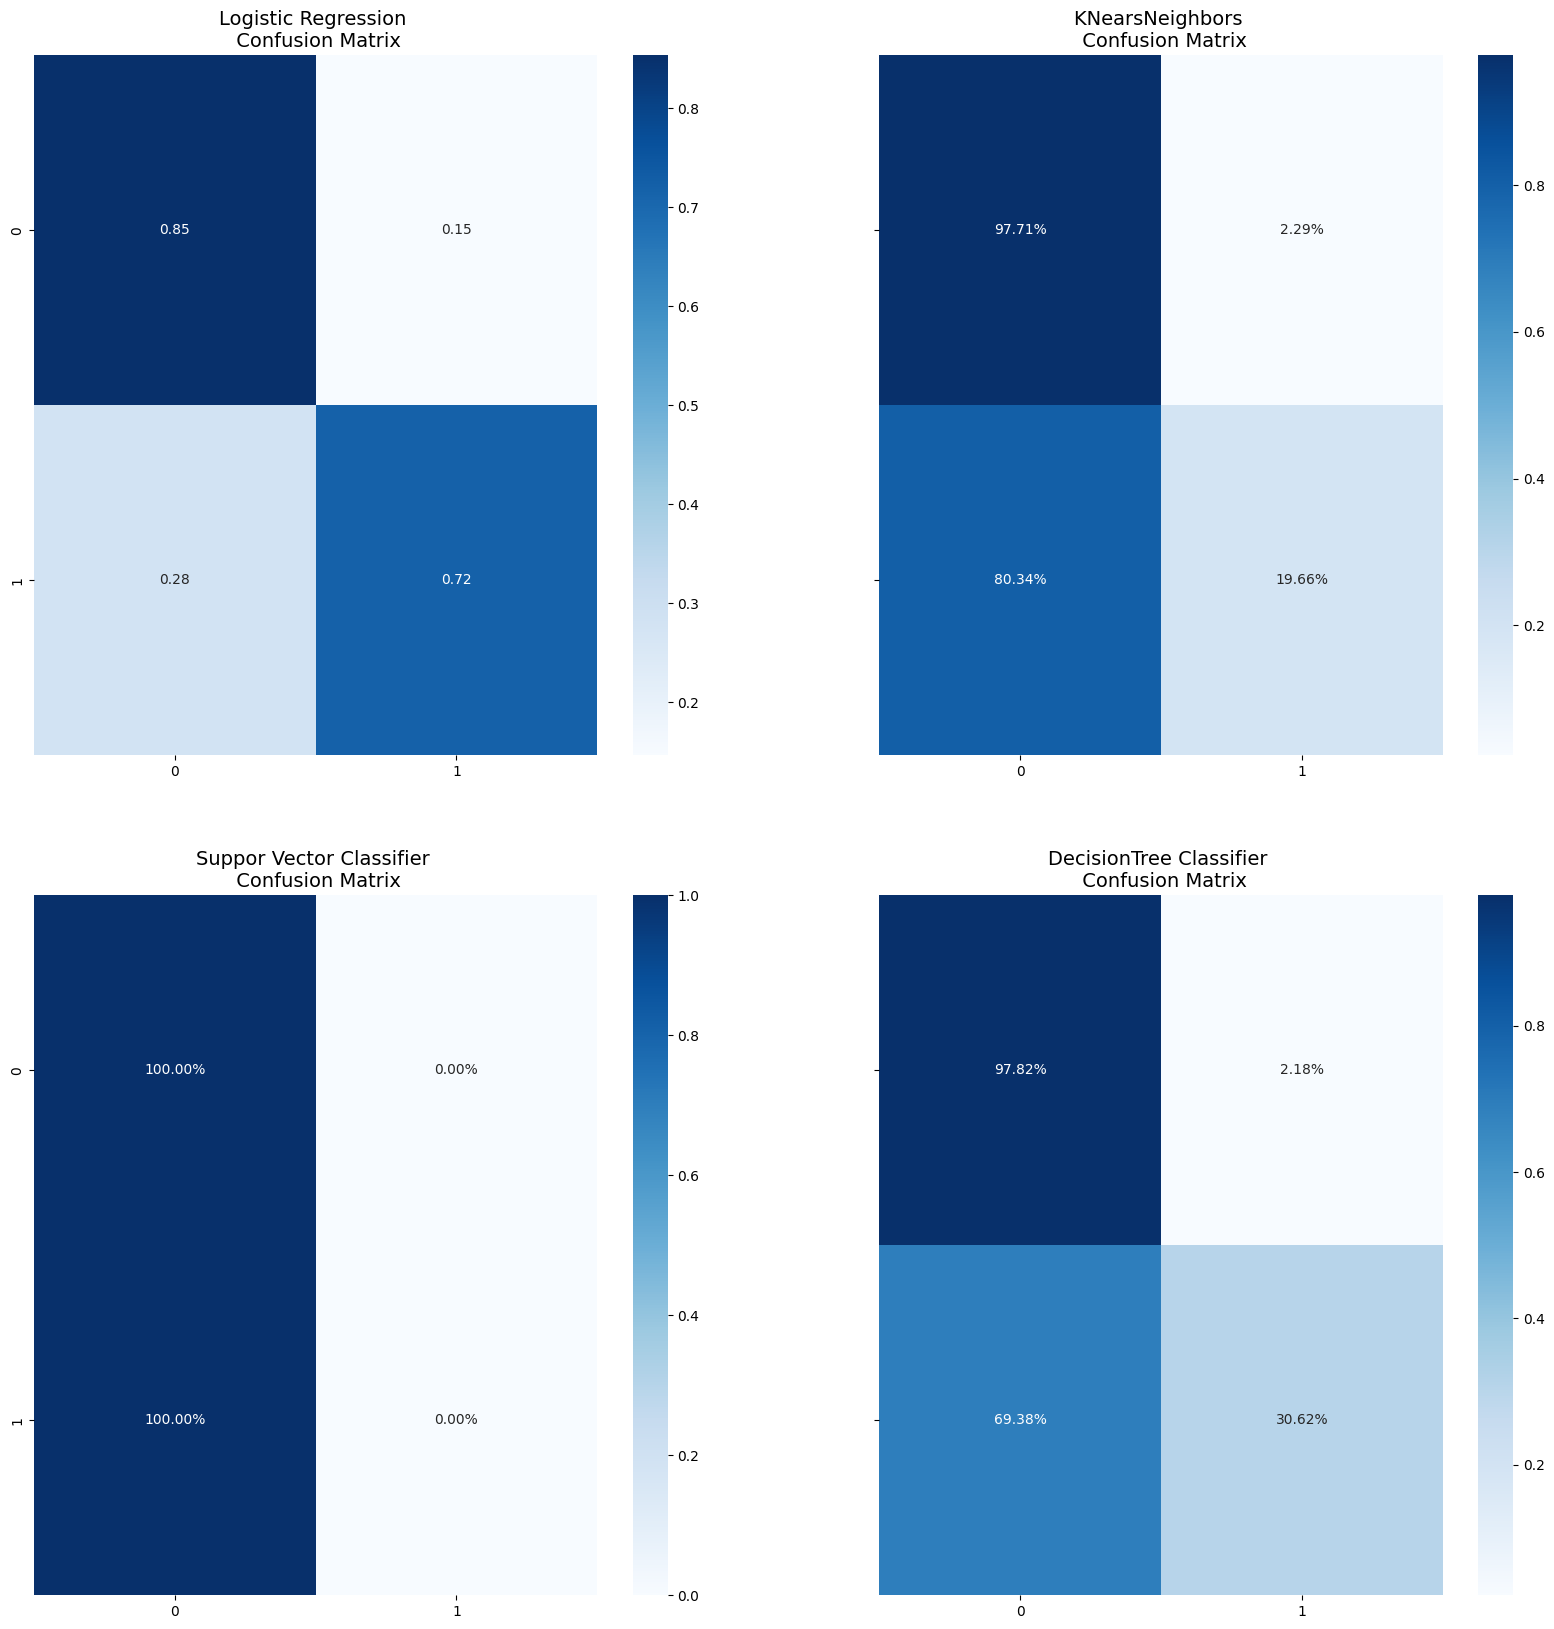

In [ ]:
y_pred_log_reg = best_est.predict(X_test)
y_pred_knear= grid_knears.best_estimator_
y_pred_knear = y_pred_knear.predict(X_test)
y_pred_svc=grid_svc.best_estimator_
y_pred_svc = y_pred_svc.predict(X_test)
y_pred_tree = grid_tree.best_estimator_
y_pred_tree = y_pred_tree.predict(X_test)


log_reg_cf = confusion_matrix(y_test, y_pred_log_reg, normalize='true')
kneighbors_cf = confusion_matrix(y_test, y_pred_knear, normalize='true')
svc_cf = confusion_matrix(y_test, y_pred_svc, normalize='true')
tree_cf = confusion_matrix(y_test, y_pred_tree, normalize='true')

fig,  ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2,figsize=(20,20), sharey=True)
# Построим матрицы ошибок
sns.heatmap(ax=ax1, data=log_reg_cf, annot=True, fmt='.2f', cmap='Blues')
ax1.set_title("Logistic Regression \n Confusion Matrix", fontsize=14)



#
sns.heatmap(ax=ax2,data=kneighbors_cf, annot=True, fmt='.2%', cmap='Blues')
ax2.set_title("KNearsNeighbors \n Confusion Matrix", fontsize=14)


#
sns.heatmap(ax=ax3, data=svc_cf, annot=True,
            fmt='.2%', cmap='Blues')
ax3.set_title("Suppor Vector Classifier \n Confusion Matrix", fontsize=14)



#
sns.heatmap(ax=ax4, data=tree_cf, annot=True,
            fmt='.2%', cmap='Blues')
ax4.set_title("DecisionTree Classifier \n Confusion Matrix", fontsize=14)


plt.show()

In [ ]:
from sklearn.metrics import classification_report



print('Logistic Regression:')
#
y_pred=  best_est.predict(original_Xtest)
print(classification_report(original_ytest, y_pred, target_names=labels))

print('KNears Neighbors:')
#
y_pred=grid_knears.best_estimator_
y_pred=  y_pred.predict(original_Xtest)
print(classification_report(original_ytest, y_pred, target_names=labels))

print('Support Vector Classifier:')
#
y_pred=  grid_svc.best_estimator_
y_pred=  y_pred.predict(original_Xtest)
print(classification_report(original_ytest, y_pred, target_names=labels))

print('Decision Tree Classifier:')
#
y_pred=  grid_tree.best_estimator_
y_pred=  y_pred.predict(original_Xtest)
print(classification_report(original_ytest, y_pred, target_names=labels))

Logistic Regression:
              precision    recall  f1-score   support

          No       0.95      0.52      0.67      7984
         Yes       0.18      0.78      0.29      1058

    accuracy                           0.55      9042
   macro avg       0.56      0.65      0.48      9042
weighted avg       0.86      0.55      0.63      9042

KNears Neighbors:
              precision    recall  f1-score   support

          No       0.91      0.98      0.94      7984
         Yes       0.63      0.27      0.38      1058

    accuracy                           0.90      9042
   macro avg       0.77      0.62      0.66      9042
weighted avg       0.88      0.90      0.88      9042

Support Vector Classifier:
              precision    recall  f1-score   support

          No       0.97      1.00      0.99      7984
         Yes       1.00      0.79      0.88      1058

    accuracy                           0.97      9042
   macro avg       0.99      0.89      0.93      9042
weighted

In [ ]:
# Логистическая регрессия с under-sampling
y_pred = grid_log_reg.best_estimator_
y_pred = y_pred.predict(original_Xtest)
undersample_score = accuracy_score(original_ytest, y_pred)

# Логистическая регрессия с over-sampling
y_pred_sm = best_est.predict(original_Xtest)
oversample_score = accuracy_score(original_ytest, y_pred_sm)

d = {'Метод': ['Random Under-Sampling', 'Oversampling (SMOTE)'], 'Score': [undersample_score, oversample_score]}
final_df = pd.DataFrame(data=d)

score = final_df['Score']
final_df.drop('Score', axis=1, inplace=True)
final_df.insert(1, 'Score', score)

final_df

,Метод,Score
0,Random Under-Sampling,0.706813
1,Oversampling (SMOTE),0.553528


Итак, в данной задаче более оптимальным подходом оказался Random Under-Sampling